In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
df=pd.read_csv('TSLA.CSV')

In [3]:
stock_data=df[['Date','Close']]

In [4]:
stock_data.loc[:,['Date']]=pd.to_datetime(stock_data['Date'])

In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [6]:
stock_data=stock_data.set_index('Date')

In [7]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


## Why we convert the column to index?
Retrieving of the data will be easy
Visualisation is easy
The libraries like scipy and sklearn want index to be in column

Summary Statistics
Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.
Visualize the Time Series Data
Plot the Time Series data

Plot the rolling mean and rolling standard deviation of the Time Series data.

Decompose the Time Series Data check for any trends, seasonality, and Noise.

Plot the decomposed components to get a better understanding of the Time Series data.

Stationarity Check
Check for stationarity.
Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.
Check for Autocorrelation
Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.
Outlier Detection
Detect and handle outliers using statistical methods or machine learning techniques.
Check for Autocorrelation
Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

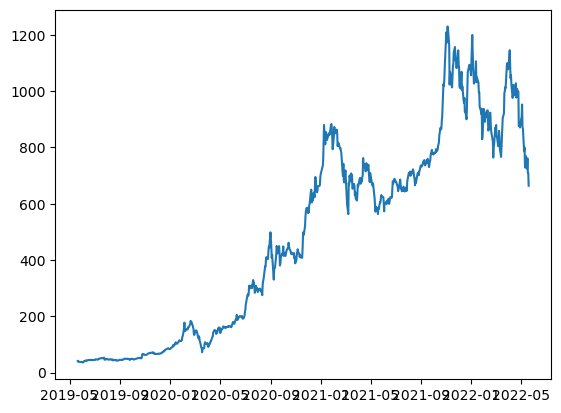

In [8]:
plt.plot(stock_data['Close'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14060\477833349.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data['Close'])


<Axes: xlabel='Close', ylabel='Density'>

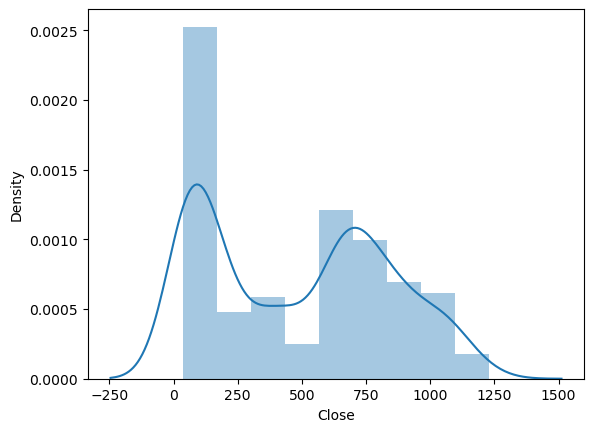

In [9]:
import seaborn as sns
sns.distplot(stock_data['Close'])

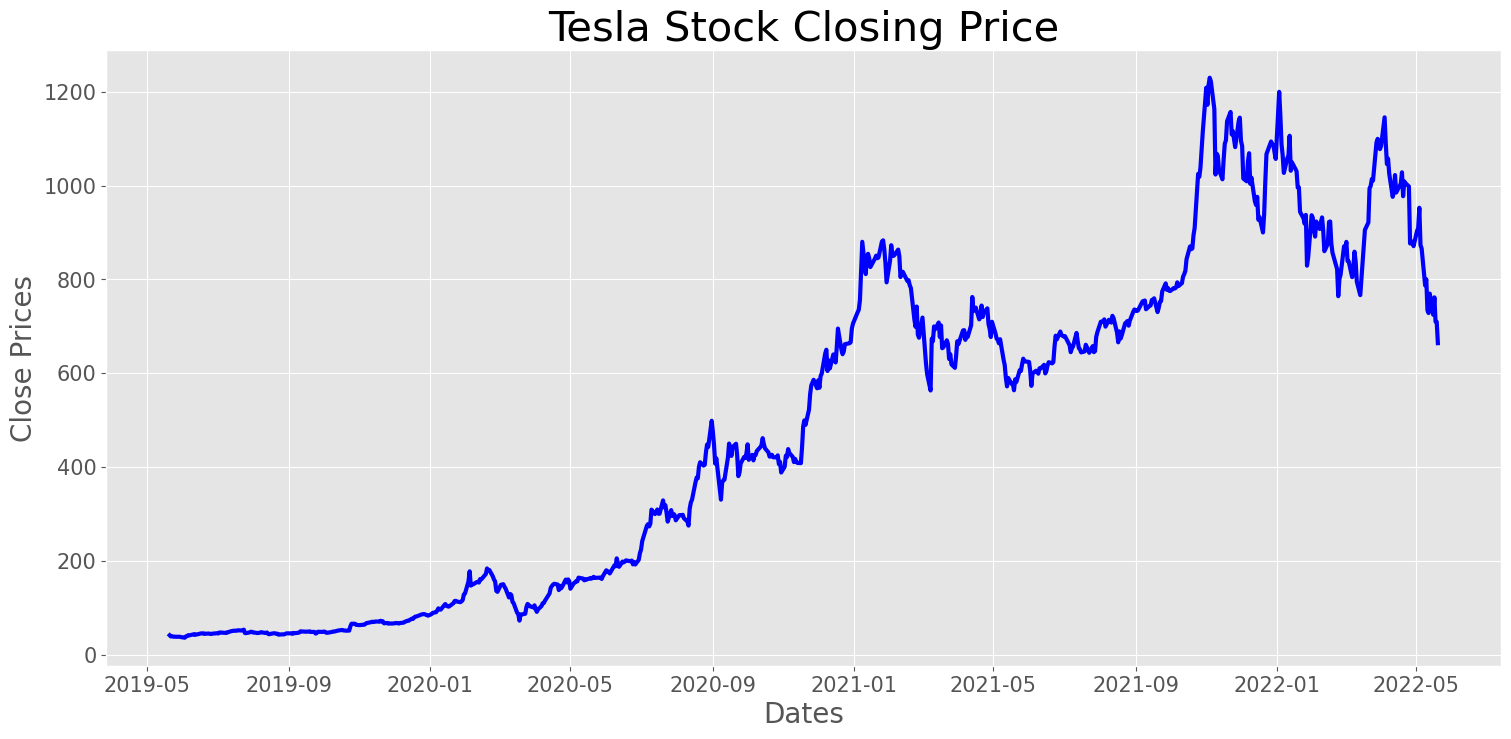

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

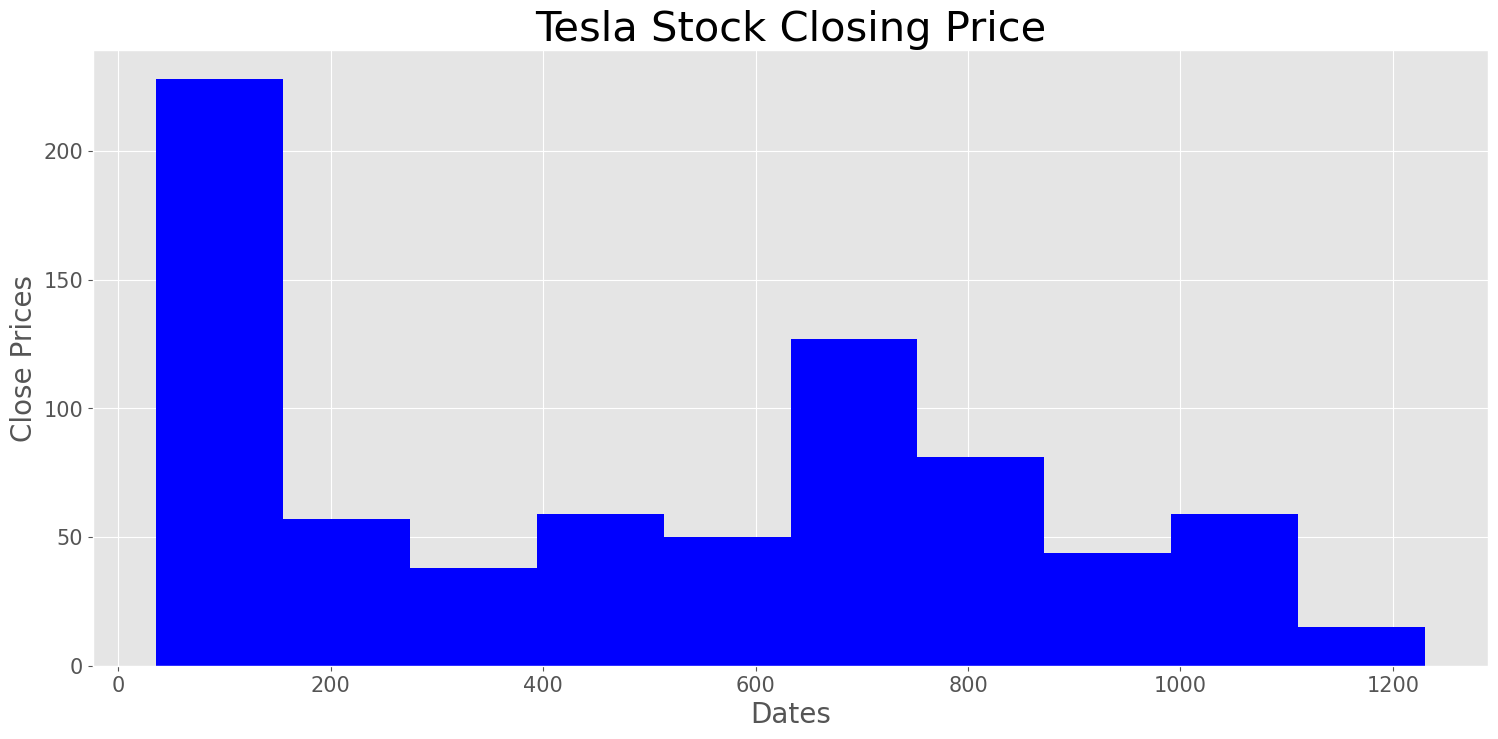

In [11]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

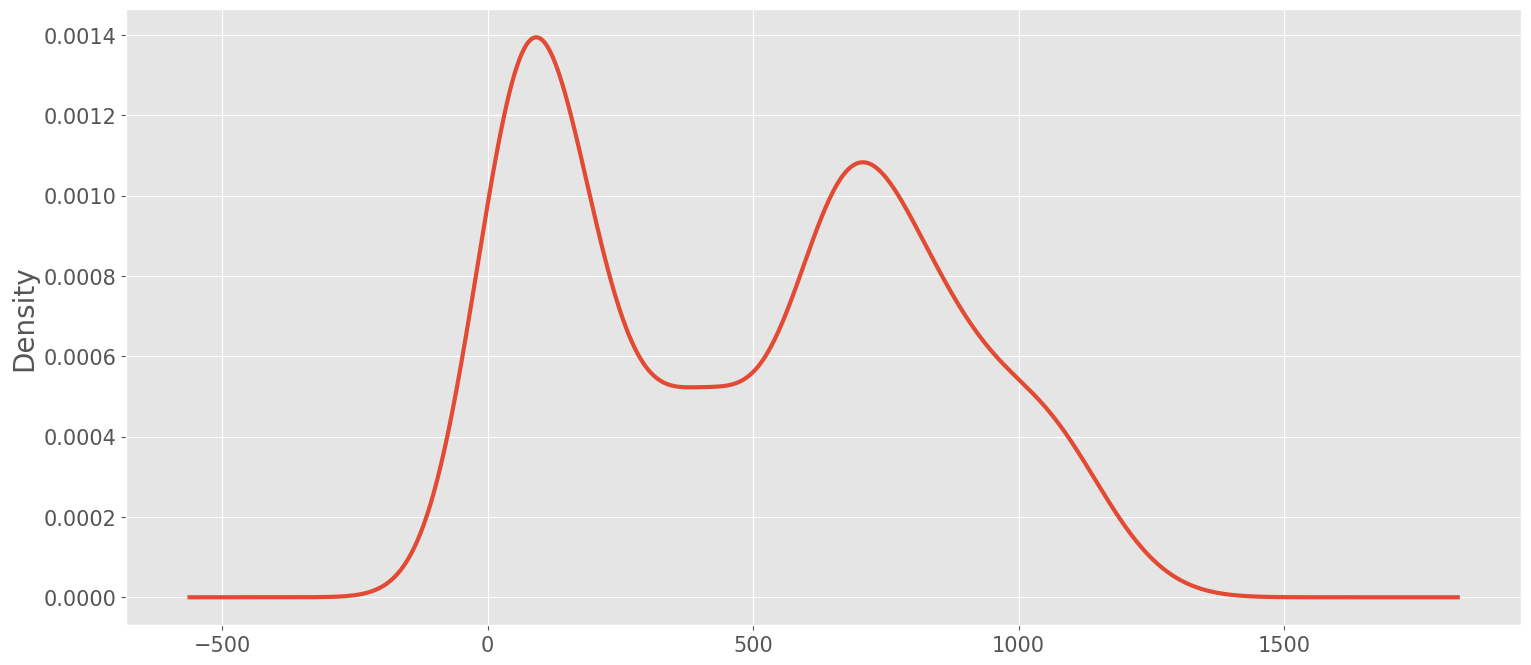

In [12]:
# Distribution of the close price
df_close = stock_data['Close']
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [13]:
rolmean=stock_data['Close'].rolling(window=120).mean()

In [14]:
rolstd=stock_data['Close'].rolling(window=120).std()

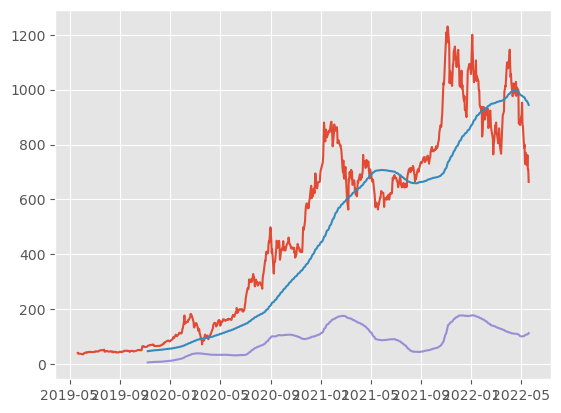

In [15]:
plt.plot(stock_data['Close'])
plt.plot(rolmean)
plt.plot(rolstd)

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
adft=adfuller(stock_data.Close)

In [18]:
pd.Series(adft[0:4],index=['test_stat','p_val','lag','data points'])

test_stat       -1.363009
p_val            0.599876
lag              9.000000
data points    748.000000
dtype: float64

In [19]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


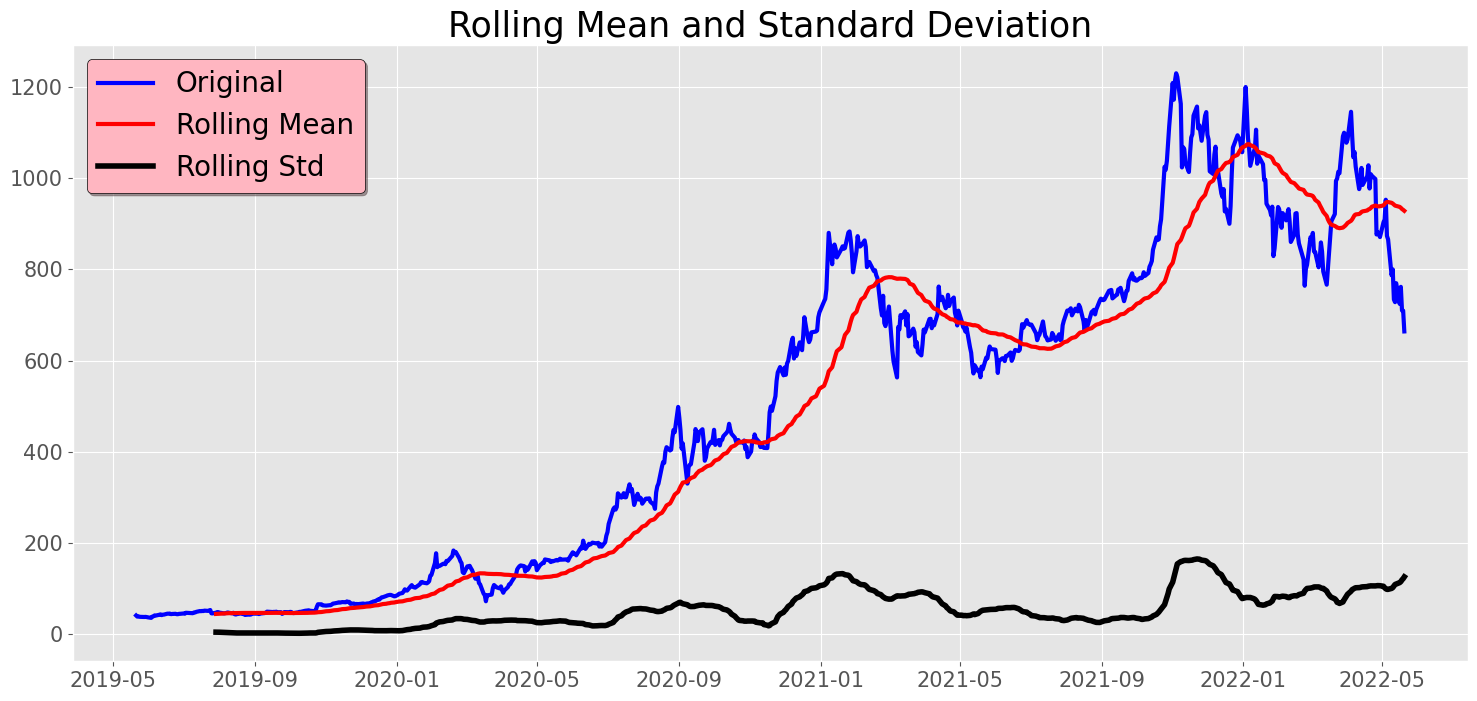

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [20]:
test_stationarity(stock_data['Close'])

<Axes: >

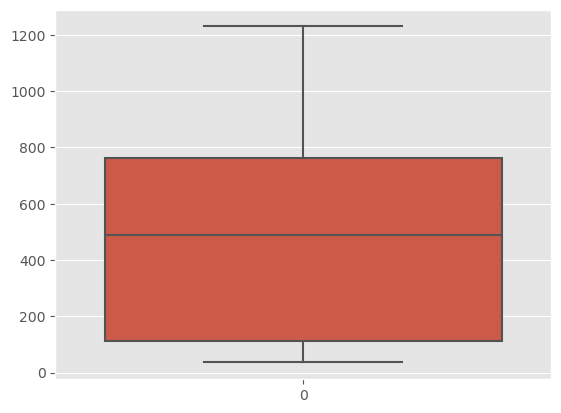

In [21]:
sns.boxplot(stock_data['Close'])

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
result=seasonal_decompose(stock_data[['Close']],period=12)

In [26]:
result

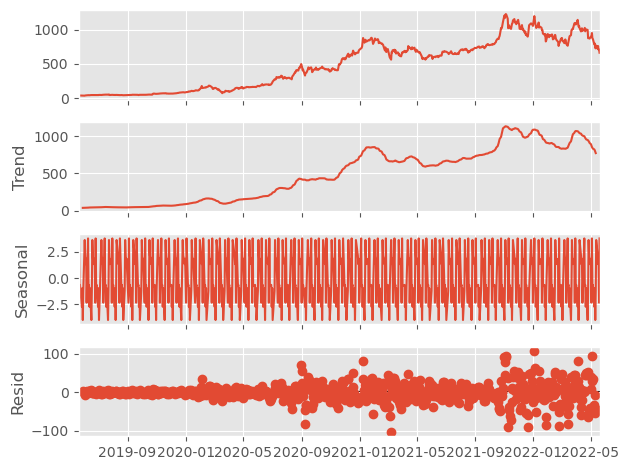

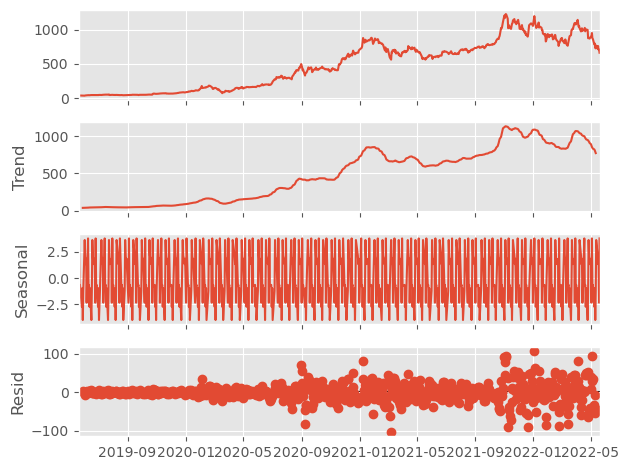

In [29]:
result.plot()

In [30]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

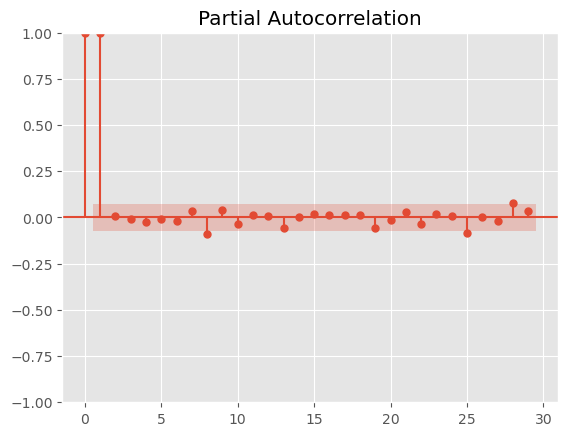

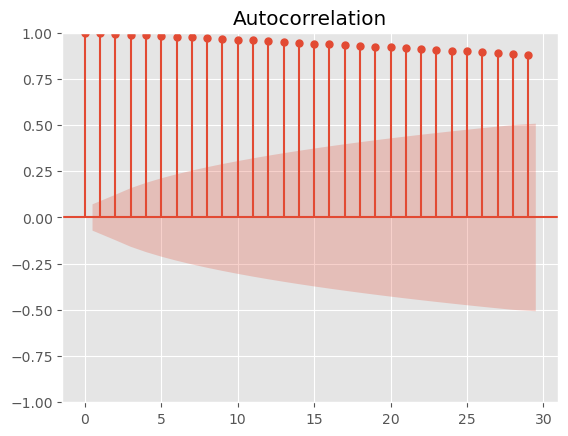

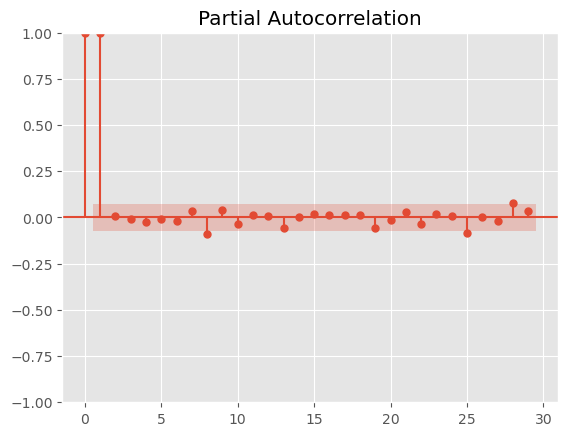

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data['Close'])

In [34]:
df_close=stock_data['Close']

In [36]:
df_close=df_close.diff()

In [38]:
df_close=df_close.dropna()

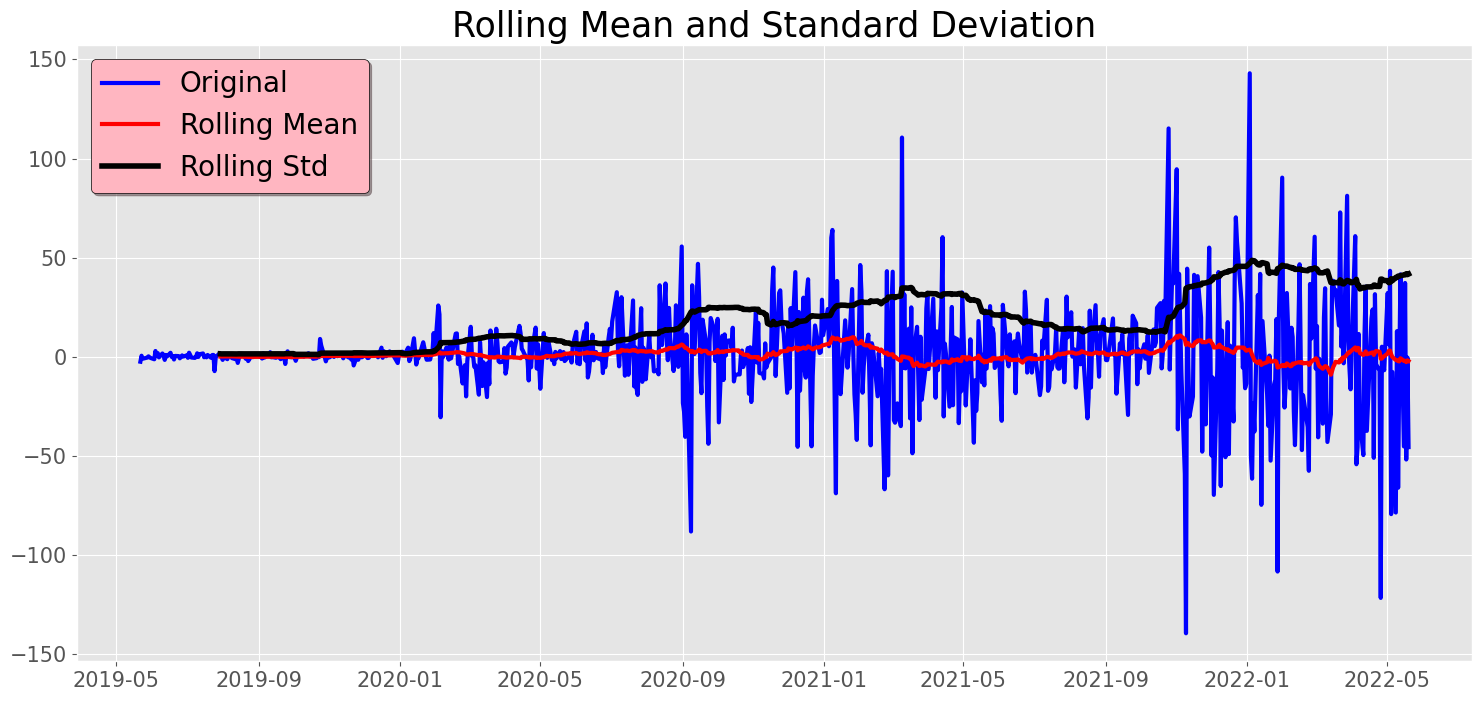

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [39]:
test_stationarity(df_close)

In [40]:
df_close[:-60]

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-02-17   -47.040039
2022-02-18   -19.369995
2022-02-22   -35.449951
2022-02-23   -57.490051
2022-02-24    36.730042
Name: Close, Length: 697, dtype: float64

In [41]:
df_close[-60:]

Date
2022-02-25      9.099976
2022-02-28     60.559998
2022-03-01     -6.059998
2022-03-02     15.520020
2022-03-03    -40.600037
2022-03-04     -1.000000
2022-03-07    -33.709961
2022-03-08     19.820007
2022-03-09     34.569946
2022-03-10    -20.669983
2022-03-11    -42.950012
2022-03-14    -28.979980
2022-03-15     35.520020
2022-03-16     38.339966
2022-03-17     31.369995
2022-03-18     33.790039
2022-03-21     15.769958
2022-03-22     72.820007
2022-03-23      5.130005
2022-03-24     14.809998
2022-03-25     -3.279968
2022-03-28     81.199951
2022-03-29      7.729980
2022-03-30     -5.579956
2022-03-31    -16.390015
2022-04-01      6.989990
2022-04-04     60.859985
2022-04-05    -54.189941
2022-04-06    -45.500000
2022-04-07     11.500000
2022-04-08    -31.770020
2022-04-11    -49.559998
2022-04-12     11.020020
2022-04-13     35.419983
2022-04-14    -37.369995
2022-04-18     19.289978
2022-04-19     23.860046
2022-04-20    -50.950012
2022-04-21     31.580017
2022-04-22     -3.73

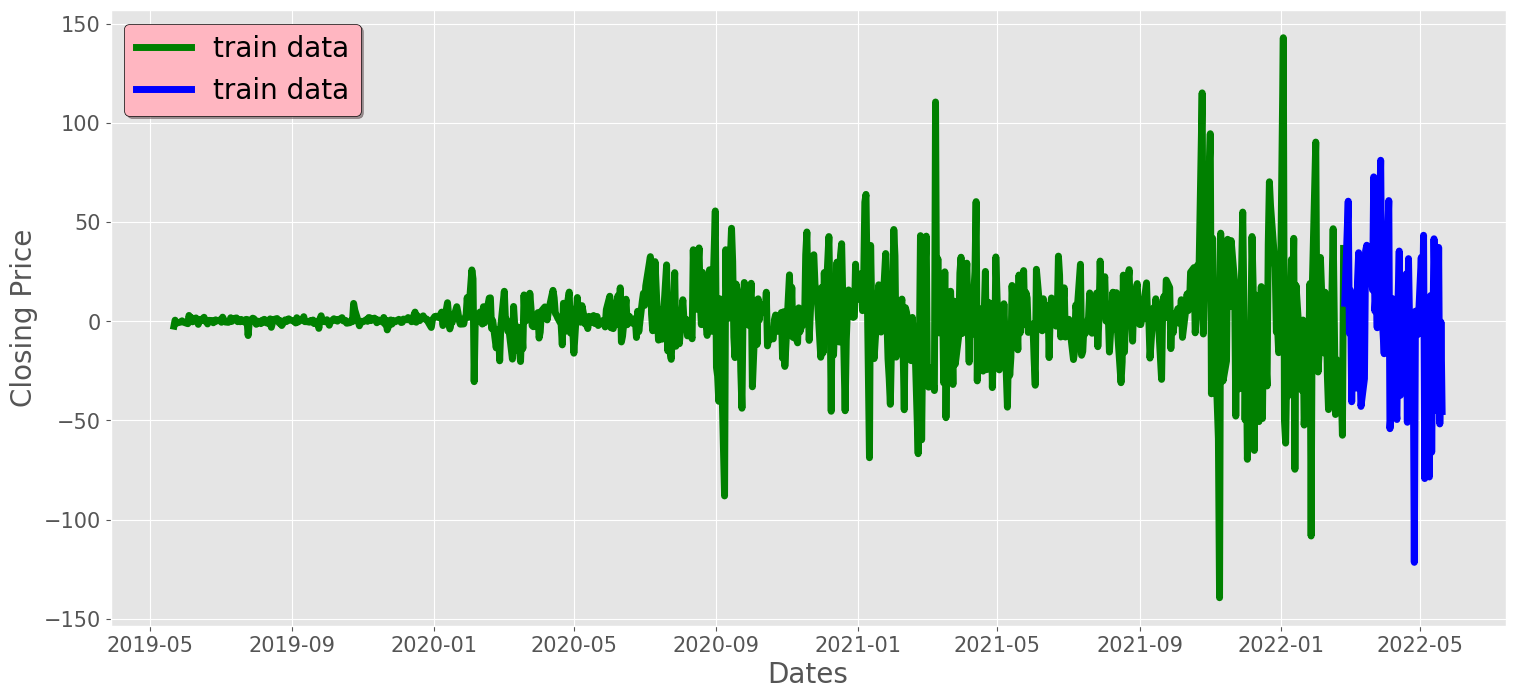

In [65]:
tr_data=df_close[:-60]
te_data=df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Closing Price',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(tr_data,'green',label="train data",linewidth=5)
plt.plot(te_data,'blue',label="train data",linewidth=5)
plt.legend(fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')

In [80]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error as mse

In [156]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


In [162]:
df_close=df[['Close']]
df_close.index=pd.to_datetime(df['Date'])
tr_data=df_close[:-60]
te_data=df_close[-60:]
history=[x for x in tr_data]

In [163]:
te_data

,Close
Date,
2022-02-25,809.869995
2022-02-28,870.429993
2022-03-01,864.369995
2022-03-02,879.890015
2022-03-03,839.289978
2022-03-04,838.289978
2022-03-07,804.580017
2022-03-08,824.400024
2022-03-09,858.969971


In [155]:
te_data

,Close
698,809.869995
699,870.429993
700,864.369995
701,879.890015
702,839.289978
703,838.289978
704,804.580017
705,824.400024
706,858.969971
707,838.299988


In [90]:
te_data=[x for x in te_data]

In [116]:
model=ARIMA(history,order=(1,1,1))

In [117]:
model=model.fit()

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Sun, 31 Mar 2024   AIC                           6306.700
Time:                        11:55:49   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
model.forecast()

array([800.20438387])

In [92]:
mse([te_data[0]],model.forecast())

93.42404085319363

In [93]:
import warnings as wn
wn.filterwarnings('ignore')

In [94]:
p_val=range(0,3)
d_val=range(0,3)
q_val=range(0,3)

In [109]:
model.forecast()[0]

800.2043838663046

In [110]:
import numpy as np

In [113]:
def train_arima(X,y,order):
    hist=[x for x in X]
    pred=[]
    for t in range(len(y)):
        model=ARIMA(hist,order=order)
        model_fit=model.fit()
        yhat=model_fit.forecast()[0]
        pred.append(yhat)
        hist.append(y[t])
    rmse=np.sqrt(mse(y,y_pred=pred))
    return rmse

In [114]:
def eval_model(data,test,p_val,d_val,q_val):
    data=data.astype('float32')
    best_score,best_cfg=float('inf'),None
    for p in p_val:
        for d in d_val:
            for q in q_val:
                order=(p,d,q)
                try:
                    rmse=train_arima(data,test,order)
                    if rmse<best_score:
                        best_score,best_cfg=rmse,order
                    print('ARIMA%s RMSE=%.3f'%(order,rmse))
                except:
                    continue
    print('Best Arima%s RMSE=%.3f'%(best_cfg,best_score))

In [115]:
eval_model(tr_data,te_data,p_val,d_val,q_val)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.164
ARIMA(0, 0, 2) RMSE=164.558
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=57.835
ARIMA(0, 2, 1) RMSE=39.611
ARIMA(0, 2, 2) RMSE=39.580
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(1, 0, 2) RMSE=39.584
ARIMA(1, 1, 0) RMSE=39.475
ARIMA(1, 1, 1) RMSE=39.555
ARIMA(1, 1, 2) RMSE=39.935
ARIMA(1, 2, 0) RMSE=46.184
ARIMA(1, 2, 1) RMSE=39.573
ARIMA(1, 2, 2) RMSE=39.731
ARIMA(2, 0, 0) RMSE=39.440
ARIMA(2, 0, 1) RMSE=39.494
ARIMA(2, 0, 2) RMSE=39.581
ARIMA(2, 1, 0) RMSE=39.635
ARIMA(2, 1, 1) RMSE=39.759
ARIMA(2, 1, 2) RMSE=39.894
ARIMA(2, 2, 0) RMSE=45.781
ARIMA(2, 2, 1) RMSE=39.739
ARIMA(2, 2, 2) RMSE=39.732
Best Arima(2, 0, 0) RMSE=39.440


In [124]:
hist=[x for x in train_data] hist=[x for x in test_data]
pred=[]
for i in range(len(te_data)):
    model=ARIMA(hist,order=(2,0,0))
    model=model.fit()
    y_pr=model.forecast(alpha=0.05)
    pred.append(y_pr)
    hist.append(te_data[i])
r_mse=np.sqrt(mse(te_data,pred))
print(r_mse)

39.439957307477314


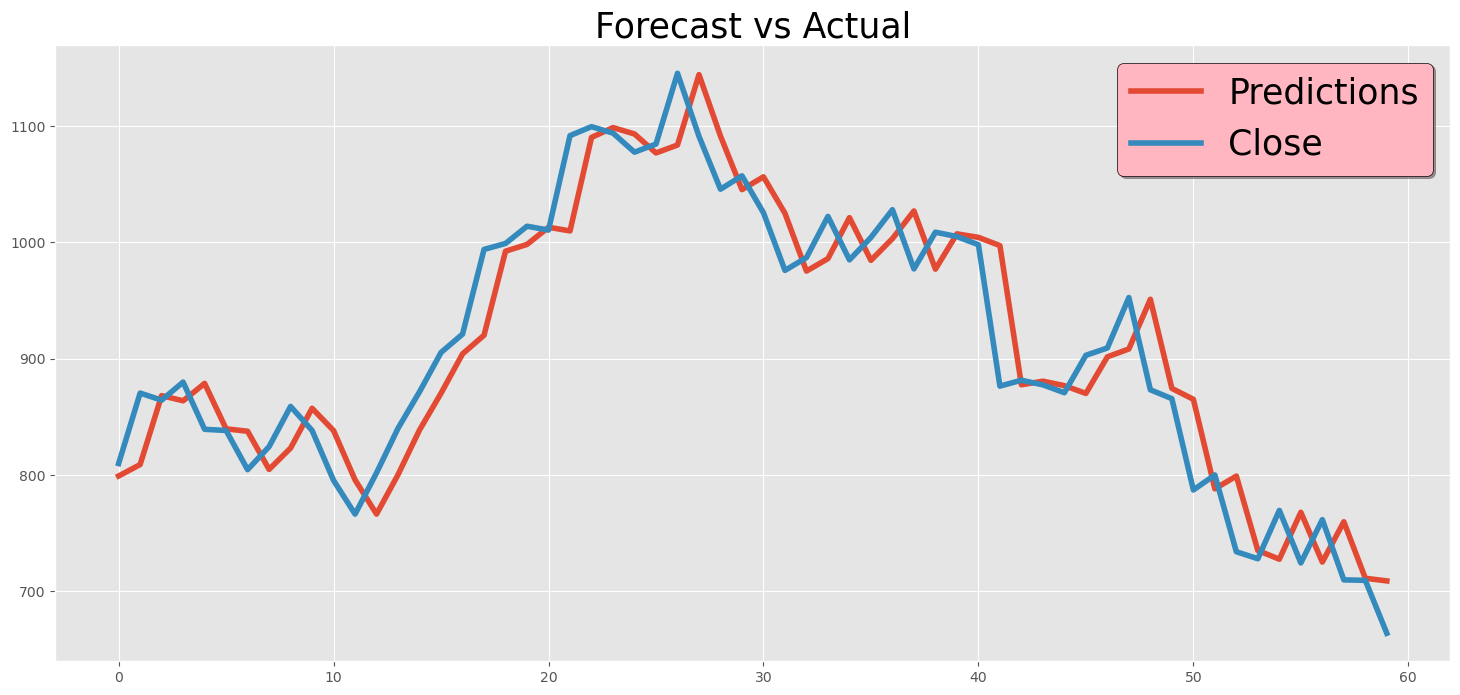

In [125]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), pred, label = 'Predictions', linewidth = 4)
plt.plot(range(60), te_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

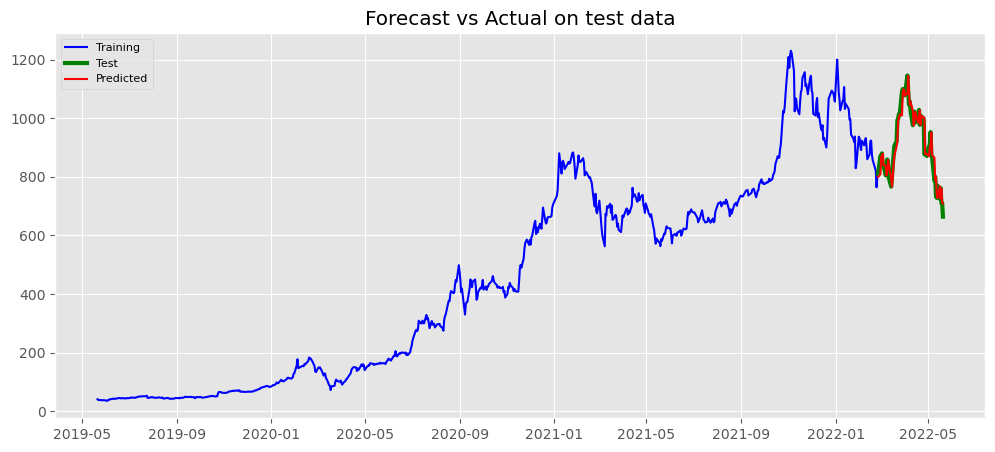

In [164]:
fc_series=pd.DataFrame(pred,index=df_close[-60:].index)
# train=pd.DataFrame(data=tr_data,index=df_close[:-60].index)
# test=pd.DataFrame(data=te_data,index=df_close[-60:].index)
plt.figure(figsize=(12,5),dpi=100)
plt.plot(tr_data,label='Training',color='blue')
plt.plot(te_data,label="Test",color='green',linewidth=3)
plt.plot(fc_series,label='Predicted',color='red')
plt.title('Forecast vs Actual on test data')
plt.legend(loc='upper left',fontsize=8)
plt.show()

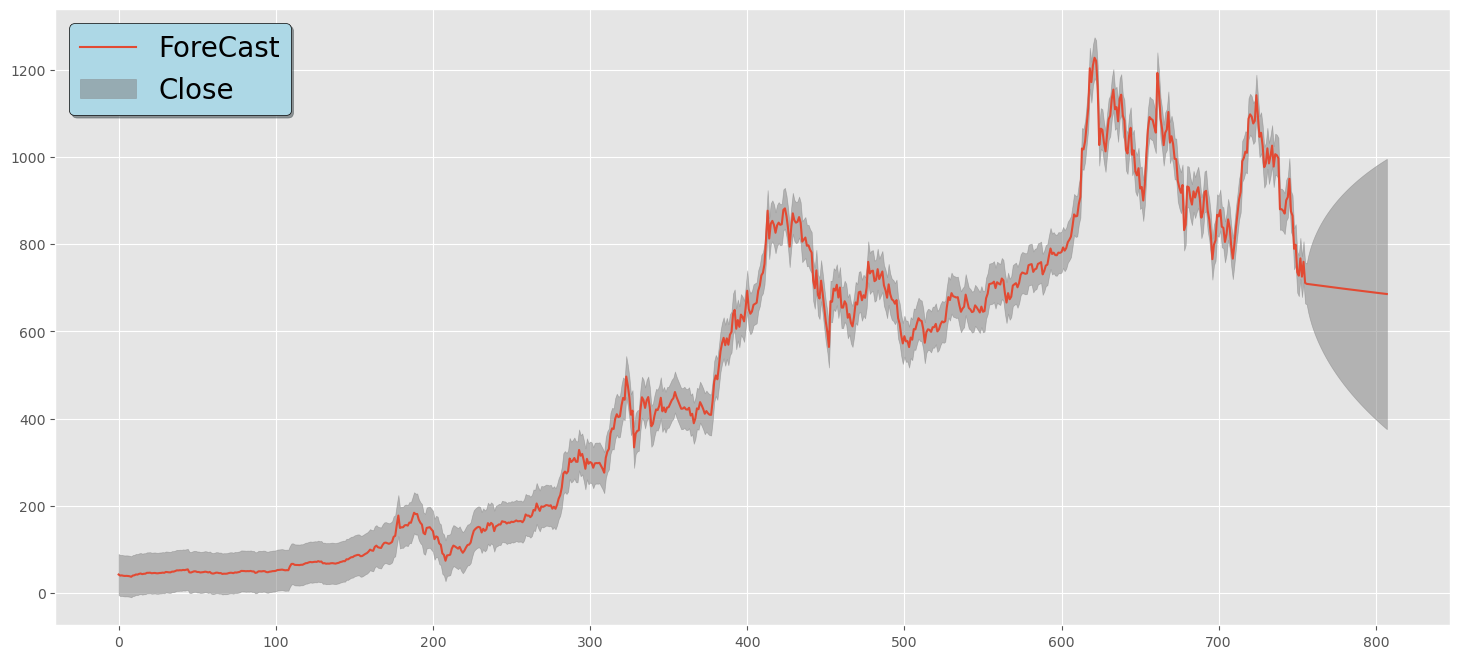

In [170]:
from statsmodels.graphics.tsaplots import plot_predict
fig=plt.figure(figsize=(18,8))
ax1=fig.add_subplot(111)
plot_predict(result=model,start=1,end=len(df_close)+50,ax=ax1)
plt.grid('both')
plt.legend(['ForeCast','Close','95% Confidence Interval'],fontsize=20,shadow=True,facecolor='lightblue',edgecolor='k')
plt.show()

In [179]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [187]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in tr_data['Close']]
predictions = list()
conf_list = list()
for t in range(len(te_data)):
    model = SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()[0]
    predictions.append(fc)
    history.append(te_data['Close'][t])
print('RMSE of SARIMA Model:', np.sqrt(mse(te_data, predictions)))

RMSE of SARIMA Model: 39.7394819514271
